In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as tf_keras

In [3]:
# 데이터 준비
(X_train, y_train), (X_test, y_test) = tf_keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [13]:
print( type(X_train) )
print( X_train.shape )
len( X_train[0] ),len( X_train[1] )
print( y_train.shape )
print( np.unique(y_train, return_counts=True) )

<class 'numpy.ndarray'>
(25000,)
(25000,)
(array([0, 1]), array([12500, 12500]))


In [14]:
# imdb 단어 사전 조회
word_idx_map = tf_keras.datasets.imdb.get_word_index()

1641221/1641221 [==============================] - 1s 0us/step


In [17]:
print( type(word_idx_map) )
for i, (k, v) in enumerate(word_idx_map.items()):
  if i == 10:
    break

  print(k, " : ", v)

<class 'dict'>
fawn  :  34701
tsukino  :  52006
nunnery  :  52007
sonja  :  16816
vani  :  63951
woods  :  1408
spiders  :  16115
hanging  :  2345
woody  :  2289
trawling  :  52008


In [19]:
# 단어 : 인덱스 조합 -> 인덱스 : 단어 조합으로 변경
idx_word_map = { idx : word for (word, idx) in word_idx_map.items() }

In [20]:
for i, (k, v) in enumerate(idx_word_map.items()):
  if i == 10:
    break

  print(k, " : ", v)

34701  :  fawn
52006  :  tsukino
52007  :  nunnery
16816  :  sonja
63951  :  vani
1408  :  woods
16115  :  spiders
2345  :  hanging
2289  :  woody
52008  :  trawling


In [26]:
# print( idx_word_map[1000000] )
# print( idx_word_map.get(1000000, '?') )

for i in range(10):
  print( idx_word_map.get(i, '?') )

?
the
and
a
of
to
is
br
in
it


In [31]:
# 단어 사전을 사용해서 문장 복원
[ idx_word_map.get(idx-3, '?') for idx in X_train[0][:10] ] # 문장의 단어 번호는 3번부터 시작

['?',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story']

In [32]:
len(X_train[0]), len(X_train[1]) # 각 입력 데이터의 크기가 다른 것 확인

(218, 189)

In [39]:
# 입력 데이터 구성 : 각 문장을 (1, 10000) 배열로 변환
def vectorize_setences(sentences, dimension=10000, bow=True):
  result = np.zeros(shape=(len(sentences), dimension)) # 0으로 초기화한 (문장갯수, 단어갯수)의 2차원 배열 구성
  for i, sentence in enumerate(sentences):
    for word_idx in sentence:
      if bow:
        result[i, word_idx] += 1 # 단어 빈도
      else:
        result[i, word_idx] = 1 # 단어 발생

  return result


In [41]:
# 입력 데이터 변환
# vectorize_setences(X_train[:2])
X_train2 = vectorize_setences(X_train, bow=False)
X_test2 = vectorize_setences(X_test, bow=False)

In [45]:
# 모델 만들기
model = tf_keras.Sequential()
# model.add(tf_keras.layers.Input(shape=(10000, )))
# model.add(tf_keras.layers.Dense(units=256, activation='relu'))
model.add(tf_keras.layers.Dense(input_shape=(10000, ), units=256, activation='relu'))
model.add(tf_keras.layers.Dense(units=128, activation='relu'))
model.add(tf_keras.layers.Dense(units=64, activation='relu'))
model.add(tf_keras.layers.Dense(units=1, activation="sigmoid"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               2560256   
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2601473 (9.92 MB)
Trainable params: 2601473 (9.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [48]:
history = model.fit(X_train2, y_train, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
79/79 [==============================] - 12s 138ms/step - loss: 0.3472 - accuracy: 0.8546 - val_loss: 0.2785 - val_accuracy: 0.8882
Epoch 2/10
79/79 [==============================] - 8s 95ms/step - loss: 0.1502 - accuracy: 0.9456 - val_loss: 0.3210 - val_accuracy: 0.8812
Epoch 3/10
79/79 [==============================] - 6s 79ms/step - loss: 0.0580 - accuracy: 0.9817 - val_loss: 0.5077 - val_accuracy: 0.8648
Epoch 4/10
79/79 [==============================] - 7s 92ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.5455 - val_accuracy: 0.8742
Epoch 5/10
79/79 [==============================] - 6s 82ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.6697 - val_accuracy: 0.8716
Epoch 6/10
79/79 [==============================] - 7s 92ms/step - loss: 8.3693e-04 - accuracy: 1.0000 - val_loss: 0.7418 - val_accuracy: 0.8734
Epoch 7/10
79/79 [==============================] - 6s 80ms/step - loss: 1.5743e-04 - accuracy: 1.0000 - val_loss: 0.7864 - val_accuracy: 0.8752
Epo

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

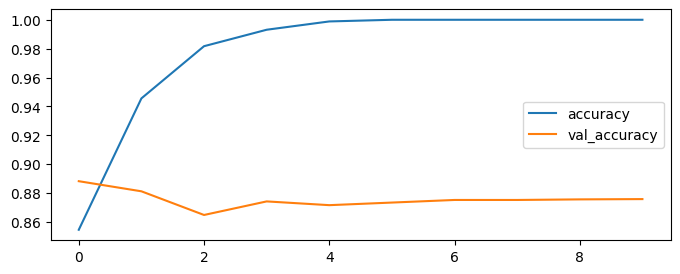

In [56]:
plt.figure(figsize=(8, 3))
plt.plot(history.epoch, history.history['accuracy'], label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

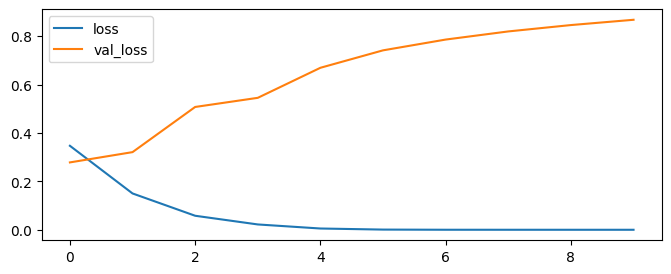

In [57]:
plt.figure(figsize=(8, 3))
plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()